## Importing Modules 

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from flask import Flask, render_template, request
import numpy as np
import pickle

## Loading Dataset 

In [42]:
data = pd.read_csv(r"C:\Users\ARYAN\Downloads\loan_approval_dataset.csv")
data.head(5) 

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## EDA 

In [43]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [44]:
data.describe() 

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [45]:
data.isnull().sum() 

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

## Replacing String Values using Label Encoding 

The List of Columns having string values are - 

1. education 

2. self_employed

3. loan_status 

In [46]:
data.columns=data.columns.str.strip()
data['education'].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [47]:
data['self_employed'].unique()

array([' No', ' Yes'], dtype=object)

In [48]:
data['loan_status'].unique()

array([' Approved', ' Rejected'], dtype=object)

In [49]:
data['education'] = data['education'].replace([' Graduate', ' Not Graduate'], [1, 0])
data['self_employed'] = data['self_employed'].replace([' Yes', ' No'], [1, 0])
data['loan_status'] = data['loan_status'].replace([' Approved', ' Rejected'], [1, 0]) 

C:\Users\ARYAN\AppData\Local\Temp\ipykernel_8792\1982064399.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['education'] = data['education'].replace([' Graduate', ' Not Graduate'], [1, 0])
C:\Users\ARYAN\AppData\Local\Temp\ipykernel_8792\1982064399.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['self_employed'] = data['self_employed'].replace([' Yes', ' No'], [1, 0])
C:\Users\ARYAN\AppData\Local\Temp\ipykernel_8792\1982064399.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remove

In [50]:
data['education'].unique()

array([1, 0], dtype=int64)

In [51]:
data['self_employed'].unique()

array([0, 1], dtype=int64)

In [52]:
data['loan_status'].unique()

array([1, 0], dtype=int64)

## Building the Model 

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report 

In [54]:
model = DecisionTreeClassifier()

In [55]:
X = data.drop(['loan_id', 'loan_status'], axis = 1)
y = data['loan_status'] 

In [56]:
# new_X.columns

In [57]:

scaler=StandardScaler()
new_X=X[['education','self_employed','no_of_dependents']]
X=X.drop(columns=['education','self_employed','no_of_dependents'])
scaler.fit(X)
scaled_X=scaler.transform(X)

In [58]:
scaled_X=pd.DataFrame(scaled_X,columns=X.columns)
new_X=pd.concat([scaled_X,new_X],axis=1)

In [59]:
new_X

,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education,self_employed,no_of_dependents
0,1.617979,1.633052,0.192617,1.032792,-0.780058,2.877289,0.832028,0.930304,1,0,2
1,-0.341750,-0.324414,-0.508091,-1.061051,-0.733924,-0.631921,-0.694993,-0.515936,0,1,0
2,1.439822,1.610933,1.594031,-0.544840,-0.057300,-0.107818,1.996520,2.407316,1,0,3
3,1.119139,1.721525,-0.508091,-0.771045,1.649637,-0.381263,0.897943,0.899533,1,0,3
4,1.689242,1.002681,1.594031,-1.264055,0.757724,0.735304,1.568075,0.007172,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...
4264,-1.446324,-1.419268,0.192617,-1.641063,-0.718546,-1.019301,-1.299210,-1.285213,1,1,5
4265,-0.626801,-0.423946,1.594031,-0.237434,-0.503257,-0.472412,-0.453306,-0.946732,0,1,0
4266,0.513405,0.969504,1.243677,-0.829046,-0.964591,1.692361,0.326683,0.714907,0,0,2
4267,-0.341750,-0.258059,-0.508091,1.044393,0.111856,-0.973727,-0.112748,0.253341,0,0,1


In [60]:
X_train, X_test, y_train, y_test = train_test_split(new_X, y, random_state=42, test_size=0.3) 

In [61]:
model.fit(X_train, y_train) 

DecisionTreeClassifier()

In [62]:
prediction = model.predict(X_test) 

In [63]:
accuracy_score(y_test, prediction) * 100 

97.89227166276346

In [64]:
print(classification_report(y_test, prediction)) 

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       471
           1       0.98      0.99      0.98       810

    accuracy                           0.98      1281
   macro avg       0.98      0.97      0.98      1281
weighted avg       0.98      0.98      0.98      1281



## Checking Accuracy for Multiple Models 

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier 

In [66]:
# models = {'DecisionTreeClassifier': DecisionTreeClassifier(),
#          'LogisticRegression': LogisticRegression(),
#          'RandomForestClassifier': RandomForestClassifier(),
#          'XGBClassifier': XGBClassifier()}

models={'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=3),
         'LogisticRegression': LogisticRegression(),
         'RandomForestClassifier': RandomForestClassifier(),
         }

for model_name, mod in models.items():
    print(f"\nChecking for {model_name}")
    model = mod
    
    model.fit(X_train, y_train)
    
    prediction = model.predict(X_test) 
    
    print(f"Accuracy Score - {accuracy_score(y_test, prediction) * 100 }\n")
    print(classification_report(y_test, prediction)) 




Checking for DecisionTreeClassifier
Accuracy Score - 96.01873536299766

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       471
           1       0.99      0.94      0.97       810

    accuracy                           0.96      1281
   macro avg       0.95      0.97      0.96      1281
weighted avg       0.96      0.96      0.96      1281


Checking for LogisticRegression
Accuracy Score - 90.32006245120999

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       471
           1       0.92      0.92      0.92       810

    accuracy                           0.90      1281
   macro avg       0.90      0.90      0.90      1281
weighted avg       0.90      0.90      0.90      1281


Checking for RandomForestClassifier
Accuracy Score - 97.73614363778297

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       471
           1       0.9

## Saving Model 

Since DecisionTreeClassifier has given the best accuracy, we will use it for building the API 

In [67]:
model = DecisionTreeClassifier(max_depth=3)

In [68]:
model.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [69]:
import pickle
import joblib

In [70]:
with open("final_model.pkl", "wb") as f:
    pickle.dump(model, f)
    
joblib.dump(model, "final_model.joblib") 

['final_model.joblib']

In [71]:
new_X

,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education,self_employed,no_of_dependents
0,1.617979,1.633052,0.192617,1.032792,-0.780058,2.877289,0.832028,0.930304,1,0,2
1,-0.341750,-0.324414,-0.508091,-1.061051,-0.733924,-0.631921,-0.694993,-0.515936,0,1,0
2,1.439822,1.610933,1.594031,-0.544840,-0.057300,-0.107818,1.996520,2.407316,1,0,3
3,1.119139,1.721525,-0.508091,-0.771045,1.649637,-0.381263,0.897943,0.899533,1,0,3
4,1.689242,1.002681,1.594031,-1.264055,0.757724,0.735304,1.568075,0.007172,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...
4264,-1.446324,-1.419268,0.192617,-1.641063,-0.718546,-1.019301,-1.299210,-1.285213,1,1,5
4265,-0.626801,-0.423946,1.594031,-0.237434,-0.503257,-0.472412,-0.453306,-0.946732,0,1,0
4266,0.513405,0.969504,1.243677,-0.829046,-0.964591,1.692361,0.326683,0.714907,0,0,2
4267,-0.341750,-0.258059,-0.508091,1.044393,0.111856,-0.973727,-0.112748,0.253341,0,0,1


In [72]:
test_data =  list(scaler.transform([[ 10000000, 100000, 2, 800, 100000, 100000, 100000, 100000]])[0])
# test_data.append([1,1,4])

C:\Users\ARYAN\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [73]:
test_data.append(1)
test_data.append(1)
test_data.append(4)


In [74]:
test_data=np.array(test_data)
test_data.reshape(1,-1)

array([[ 1.76050476, -1.66256862, -1.55915146,  1.16039506, -1.13374727,
        -1.11044972, -1.65075492, -1.50061097,  1.        ,  1.        ,
         4.        ]])

In [75]:
loaded_model = joblib.load("final_model.joblib") 

In [76]:
loaded_model.predict([test_data]) 

C:\Users\ARYAN\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [77]:
import sklearn; print(sklearn.__version__) 

1.5.1


In [78]:
# !pip install --upgrade scikit-learn 

In [79]:
# !pip uninstall scikit-learn 

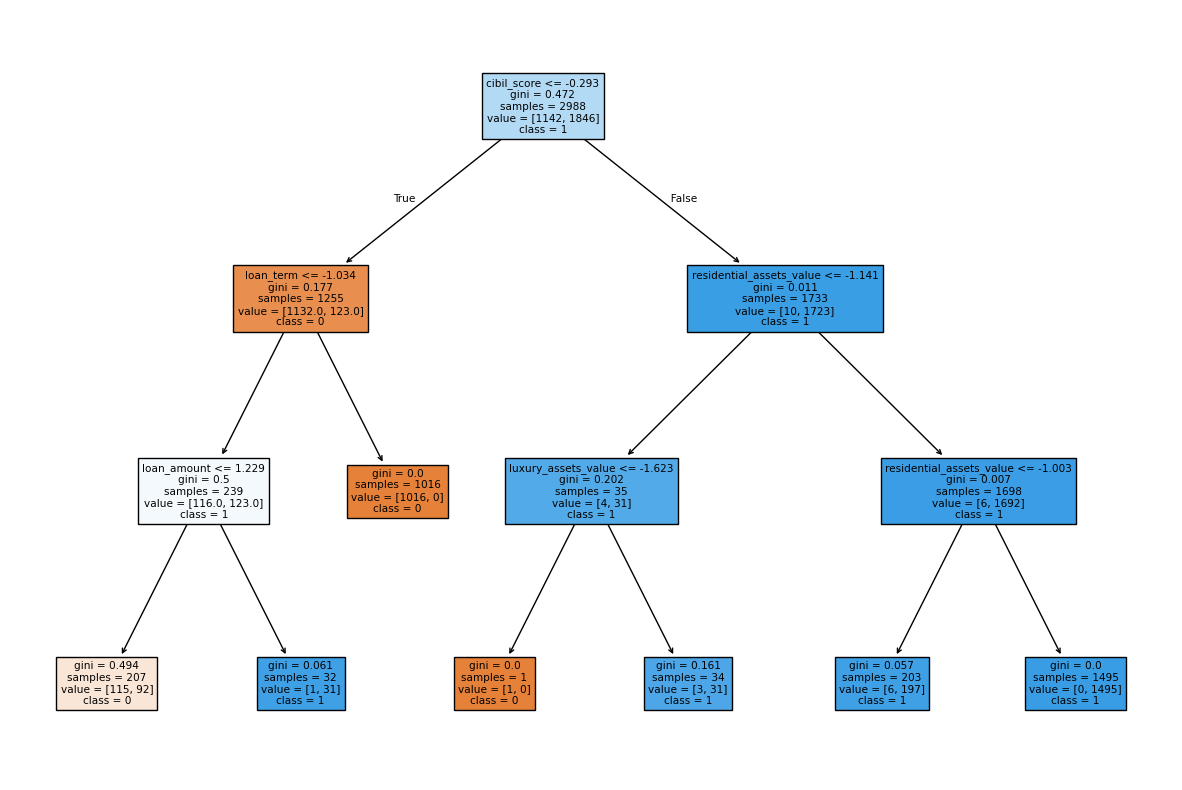

In [80]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=new_X.columns, class_names=["0", "1"], filled=True)
plt.show()

The given classification reports compare Decision Tree, Logistic Regression, and Random Forest Classifiers for predicting loan approvals (1) and rejections (0). Below is a detailed analysis.

1. Decision Tree Classifier Analysis
Accuracy: 96.02% – High predictive performance.
Precision & Recall:
Rejected Loans (0): Precision = 0.91, Recall = 0.99, F1-score = 0.95.
Approved Loans (1): Precision = 0.99, Recall = 0.94, F1-score = 0.97.
Inference:
The model effectively classifies both approved and rejected loans with high accuracy.
A recall of 0.99 for rejected loans suggests it correctly identifies most rejected applications.
A precision of 0.99 for approved loans means that when it predicts a loan approval, it is correct in most cases.
Overall, it is a high-performing classifier.
2. Logistic Regression Analysis
Accuracy: 90.32%.
Precision & Recall:
Rejected Loans (0): Precision = 0.87, Recall = 0.87, F1-score = 0.87.
Approved Loans (1): Precision = 0.92, Recall = 0.92, F1-score = 0.92.
Inference:
Logistic Regression offers balanced performance but has lower accuracy (90.32%) than Decision Tree and Random Forest.
Precision and recall values are fairly close, meaning it treats approvals and rejections fairly.
It is a simple and interpretable model, which makes it useful for understanding key factors influencing loan approvals.
Limitations of Logistic Regression
Cannot Handle Complex Relationships:
It assumes a linear relationship between features and outcomes, making it less effective when dealing with complex decision boundaries in real-world loan data.
Not Robust to Outliers:
Logistic Regression is sensitive to outliers, which can distort predictions.
Lower Accuracy Compared to Tree-Based Models:
It performs well for simple datasets, but when dealing with more complex patterns, tree-based models (like Decision Tree & Random Forest) outperform it.
3. Random Forest Classifier Analysis
Accuracy: 97.73% – The highest among all models.
Precision & Recall:
Rejected Loans (0): Precision = 0.97, Recall = 0.97, F1-score = 0.97.
Approved Loans (1): Precision = 0.98, Recall = 0.98, F1-score = 0.98.
Inference:
The highest accuracy (97.73%) indicates strong predictive power.
Random Forest maintains high precision and recall across both loan approvals and rejections, making it highly reliable.
The model is an ensemble of multiple Decision Trees, leading to more stable and accurate predictions.
Why Random Forest is a Better Choice?
Higher Accuracy & Stability:
With 97.73% accuracy, Random Forest outperforms Decision Tree and Logistic Regression, making it the best model for loan predictions.
Better Generalization:
Unlike a single Decision Tree, Random Forest reduces overfitting by averaging multiple decision trees.
Handles Non-Linearity & Complex Patterns:
It captures complex relationships between loan features without assuming linearity, unlike Logistic Regression.
Less Sensitive to Outliers:
Random Forest is more robust to outliers compared to Logistic Regression.
Feature Importance:
It can identify which factors (e.g., income, credit score, loan amount) are most important in loan approvals, making it valuable for decision-making.
